# MadMiner physics tutorial (part 4B)

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [1]:
import logging

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d

In [2]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information from a SALLY model

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [3]:
#fisher = FisherInformation("data/lhe_data_shuffled.h5")
fisher = FisherInformation('data/delphes_data_shuffled.h5')

17:38 madminer.analysis.da INFO    Loading data from data/delphes_data_shuffled.h5
17:38 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
17:38 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
17:38 madminer.utils.inter INFO    HDF5 file does not contain systematic information
17:38 madminer.analysis.da INFO    Found 2 parameters
17:38 madminer.analysis.da INFO      0: CWL2 (LHA: dim6 2, Power: 2, Range: (-20.0, 20.0))
17:38 madminer.analysis.da INFO      1: CPWL2 (LHA: dim6 5, Power: 2, Range: (-20.0, 20.0))
17:38 madminer.analysis.da INFO    Did not find nuisance parameters
17:38 madminer.analysis.da INFO    Found 6 benchmarks
17:38 madminer.analysis.da INFO    Found 3 observables
17:38 madminer.analysis.da INFO    Found 4190 events
17:38 madminer.analysis.da INFO      4190 signal events sampled from benchmark sm
17:38 madminer.analysis.da INFO      0 signal events sampled from benchmark w
17:38 madminer.anal

This class provides different functions:
- `rate_information()` calculates the Fisher information in total rates,
- `histo_information()` calculates the Fisher information in 1D histograms,
- `histo_information_2d()` calculates the Fisher information in 2D histograms,
- `full_information()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `truth_information()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [4]:
info_sally, _ = fisher.full_information(
    theta=[0.0, 0.0],
    model_file="models/sally",
    luminosity=300.0 * 1000.0,
)

print("Fisher information after 300 ifb:\n{}".format(info_sally))

17:38 madminer.ml.base     INFO    Loading model from models/sally
17:38 madminer.fisherinfor INFO    Found 2 parameters in Score Estimator model, matching 2 physical parameters in MadMiner file
17:38 madminer.fisherinfor INFO    Evaluating rate Fisher information
17:38 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
17:38 madminer.ml.base     INFO    Loading evaluation data
17:38 madminer.ml.base     INFO    Calculating Fisher information


Fisher information after 300 ifb:
[[59.59022605  2.18064339]
 [ 2.18064339 57.56815797]]


For comparison, we can calculate the Fisher information in the histogram of observables:

In [5]:
info_histo_1d, cov_histo_1d = fisher.histo_information(
    theta=[0.0, 0.0],
    luminosity=300.0 * 1000.0,
    observable="pt_j1",
    bins=[30.0, 100.0, 200.0, 400.0],
    histrange=[30.0, 400.0],
)

print("Histogram Fisher information after 300 ifb:\n{}".format(info_histo_1d))

17:38 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
17:38 madminer.fisherinfor INFO      Bin 5: (0.00194 +/- 0.00047) fb (24 %)
17:38 madminer.fisherinfor INFO      Bin 1: (0.00559 +/- 0.00080) fb (14 %)
17:38 madminer.fisherinfor INFO      Bin 4: (0.03627 +/- 0.00203) fb (6 %)
17:38 madminer.fisherinfor INFO      Bin 3: (0.16104 +/- 0.00429) fb (3 %)
17:38 madminer.fisherinfor INFO      Bin 2: (0.27303 +/- 0.00558) fb (2 %)
17:38 madminer.fisherinfor WARNING Cannot include nuisance parameters as none were found in the setup file


Histogram Fisher information after 300 ifb:
[[49.38184763 -2.11351415]
 [-2.11351415  0.83502402]]


We can do the same thing in 2D:

In [6]:
info_histo_2d, cov_histo_2d = fisher.histo_information_2d(
    theta=[0.0, 0.0],
    luminosity=300.0 * 1000.0,
    observable1="pt_j1",
    bins1=[30.0, 100.0, 200.0, 400.0],
    histrange1=[30.0, 400.0],
    observable2="delta_phi_jj",
    bins2=5,
    histrange2=[0, 6.2],
)

print("Histogram Fisher information after 300 ifb:\n{}".format(info_histo_2d))

17:39 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
17:39 madminer.fisherinfor INFO      Bin (1, 4): (0.00057 +/- 0.00026) fb (45 %)
17:39 madminer.fisherinfor INFO      Bin (5, 4): (0.00068 +/- 0.00028) fb (41 %)
17:39 madminer.fisherinfor INFO      Bin (1, 2): (0.00103 +/- 0.00034) fb (33 %)
17:39 madminer.fisherinfor INFO      Bin (1, 3): (0.00125 +/- 0.00038) fb (30 %)
17:39 madminer.fisherinfor INFO      Bin (5, 1): (0.00125 +/- 0.00038) fb (30 %)
/work/gallim/GenStudies/madminer/madminer/fisherinformation/information.py:1219: RuntimeWarning: divide by zero encountered in divide
  inv_sigma = sanitize_array(1.0 / sigma)  # Shape (n_events,)
17:39 madminer.fisherinfor WARNING Cannot include nuisance parameters as none were found in the setup file


Histogram Fisher information after 300 ifb:
[[53.44100316 -0.62919434]
 [-0.62919434 32.29106139]]


## 2. Calculating the Fisher information from a SALLY model

We can also calculate the Fisher Information using an ALICES model

In [7]:
info_alices, _ = fisher.full_information(
    theta=[0.0, 0.0],
    model_file="models/alices",
    luminosity=300.0 * 1000.0,
)

print("Fisher information using ALICES after 300 ifb:\n{}".format(info_alices))

17:39 madminer.ml.base     INFO    Loading model from models/alices
17:39 madminer.fisherinfor INFO    Found 2 parameters in Parameterized Ratio Estimator model, matching 2 physical parameters in MadMiner file
17:39 madminer.fisherinfor INFO    Evaluating rate Fisher information
17:39 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
17:39 madminer.ml.base     INFO    Loading evaluation data
17:39 madminer.ml.base     INFO    Calculating Fisher information


Fisher information using ALICES after 300 ifb:
[[60.74275472 -2.89415779]
 [-2.89415779 37.67842095]]


## 3. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

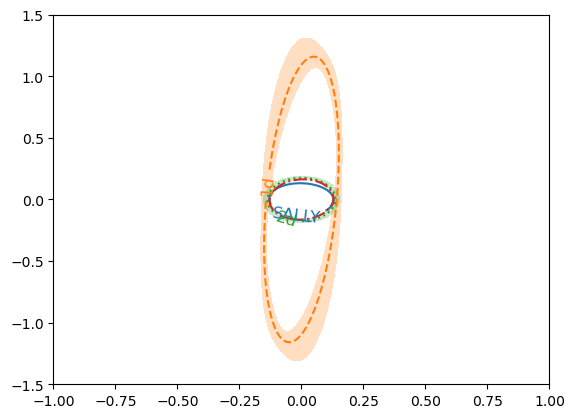

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = plot_fisher_information_contours_2d(
    [info_sally, info_histo_1d, info_histo_2d, info_alices],
    [None, cov_histo_1d, cov_histo_2d, None],
    inline_labels=["SALLY", "1d", "2d", "ALICES"],
    xrange=(-1, 1),
    yrange=(-1.5, 1.5),
    ax=ax
);